# Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
df.shape

(10000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df["Weight"].corr(df["Height"])

0.9247562987378066

In [9]:
df["Gender"]=df.Gender.apply(lambda x: 0 if x=="Female" else 1)

In [10]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [11]:
df["Weight"].corr(df["Gender"])

0.7967233452062233

In [12]:
df["Gender"].corr(df["Height"])

0.6910720382563575

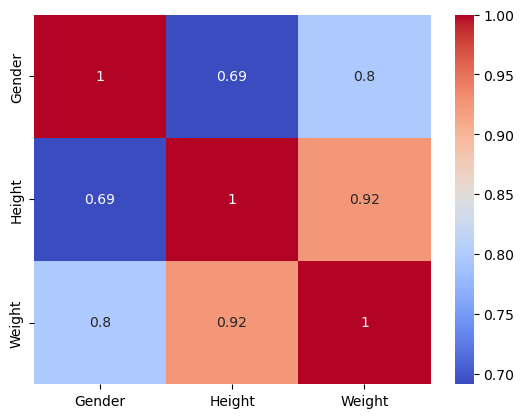

In [13]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

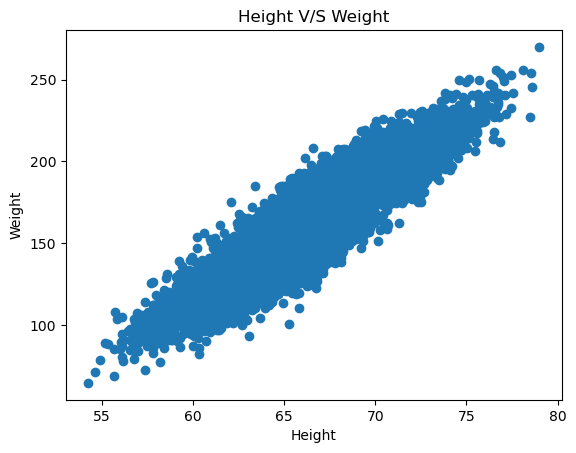

In [14]:
plt.title("Height V/S Weight")
plt.scatter(x=df["Height"],y=df["Weight"])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

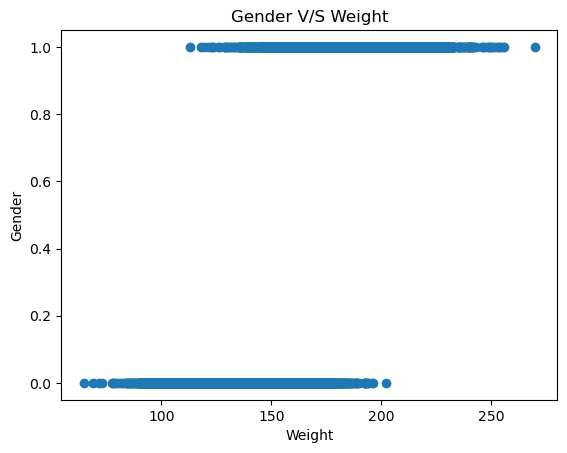

In [15]:
plt.title("Gender V/S Weight")
plt.scatter(x=df["Weight"],y=df["Gender"])
plt.xlabel("Weight")
plt.ylabel("Gender")
plt.show()

In [16]:
X=df.drop(["Weight","Gender"],axis=1)
y=df["Weight"]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=123)

In [18]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()

In [19]:
mlr.fit(X_train,y_train)

LinearRegression()

In [20]:
mlr.coef_

array([7.72406641])

In [21]:
mlr.intercept_

-351.29837817648445

# Prediction On Training Data

In [23]:
y_train_pred=mlr.predict(X_train)
y_train_pred

array([206.38851398, 111.38520117, 147.8229223 , ..., 137.78809862,
       181.6424314 , 161.92834938])

In [24]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score

In [25]:
mean_absolute_error(y_train,y_train_pred)

9.74040152334761

In [26]:
root_mean_squared_error(y_train_pred,y_train)

12.254376568477571

In [27]:
r2_score(y_train_pred,y_train)

0.8266362631660384

# Prediction On Testing Data

In [29]:
y_test_prediction=mlr.predict(X_test)
y_test_prediction

array([213.96245389, 200.45776059, 112.35222354, ..., 141.37247272,
       126.74841213, 220.17363784])

In [30]:
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

In [31]:
mean_absolute_error(y_test_prediction,y_test)

9.7595140228056

In [32]:
root_mean_squared_error(y_test_prediction,y_test)

12.136409321802386

In [33]:
r2_score(y_test_prediction,y_test)

0.840287345419776

In [37]:
def predict_weight(height):
    prediction = mlr.predict([[height]])  
    return prediction[0]

height = float(input("If you want to guess your weight, please provide your height in feet: ")) * 12
weight_kg = predict_weight(height) * 0.453592
print(f"Our model says your weight is about {weight_kg:.2f} kgs")


If you want to guess your weight, please provide your height in feet:  8


Our model says your weight is about 177.00 kgs


In [41]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(mlr, f)